In [1]:
import tensorflow as tf

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
X_train=np.loadtxt('C:\\Users\\admin\\Desktop\\keras\\all\\train.csv', delimiter=",", usecols=range(1, 94), skiprows=1)
X_test=np.loadtxt('C:\\Users\\admin\\Desktop\\keras\\all\\test.csv', delimiter=",", usecols=range(1, 94), skiprows=1)

labels=np.genfromtxt('C:\\Users\\admin\\Desktop\\keras\\all\\train.csv', delimiter=",", usecols=(94),dtype='str', skip_header=1)

In [4]:
np.unique(labels)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype='<U7')

In [5]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [6]:
enc=OneHotEncoder()
lbl=LabelEncoder()
labels= LabelEncoder().fit_transform(labels.ravel())
trans_labels=labels.reshape(-1,1)
Y_train=enc.fit_transform(trans_labels).toarray()

In [7]:
nb_classes=Y_train.shape[1]
dims=X_train.shape[1]
print(nb_classes, "Classes")
print(dims, "dims")

9 Classes
93 dims


## using TensorFlow

In [8]:
learning_rate=0.01
training_epochs=25
display_step=1

In [9]:
x=tf.placeholder("float", [None, dims])
y=tf.placeholder("float", [None, nb_classes])

## Model

In [10]:
with tf.name_scope("model") as scope:
    W=tf.Variable(tf.zeros([dims, nb_classes]))
    b=tf.Variable(tf.zeros([nb_classes]))
    activation=tf.nn.softmax(tf.matmul(x, W)+b)
    
    w_h=tf.summary.histogram("weights_histogram", W)
    b_h=tf.summary.histogram("biasses_histogram", b)
    tf.summary.scalar('mean_weights', tf.reduce_mean(W))
    tf.summary.scalar('mean_bias', tf.reduce_mean(b))

#minimize error by optimizing crossEntropy
with tf.name_scope("cost_function") as scope:
    cross_entropy=y*tf.log(activation)
    cost=tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))
    
    #create the summary to monitor costFunction
    tf.summary.scalar("cost_function", cost)
    tf.summary.histogram("cost_histogram", cost)

with tf.name_scope("train") as scope:
    #Set the optimizer
    optimiser=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Accuracy

In [11]:
with tf.name_scope("Accuracy") as scope:
    correct_prediction=tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    #calculate accuracy
    accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))
    #create a summary to monitor the costFunction
    tf.summary.scalar('accuracy', accuracy)

## Creating Session for TF

In [ ]:
# LOGDIR="/temp/logistic_logs"
# import os, shutil
# if os.path.indir(LOGDIR):
#     shutil.rmtree(LOGDIR)
# os.mkdir(LOGDIR)
# writer=tf.summary.FileWriter(LOGDIR, graph=tf.get_default_graph())

In [12]:
for var in tf.get_collection(tf.GraphKeys.SUMMARIES):
    print(var.name)
summary_op=tf.summary.merge_all()
print('Summary Op:'+ summary_op)

model/weights_histogram:0
model/biasses_histogram:0
model/mean_weights:0
model/mean_bias:0
cost_function/cost_function:0
cost_function/cost_histogram:0
Accuracy/accuracy:0
Tensor("add:0", shape=(), dtype=string)


accuracy epoch 0:0.664969801902771
accuracy epoch 1:0.6653576493263245
accuracy epoch 2:0.6657131910324097
accuracy epoch 3:0.6659879088401794
accuracy epoch 4:0.6662626266479492
accuracy epoch 5:0.6665858626365662
accuracy epoch 6:0.6668282747268677
accuracy epoch 7:0.6671029925346375
accuracy epoch 8:0.6674585342407227
accuracy epoch 9:0.6678140759468079
accuracy epoch 10:0.6680726408958435
accuracy epoch 11:0.6682665944099426
accuracy epoch 12:0.6684443354606628
accuracy epoch 13:0.6687352657318115
accuracy epoch 14:0.6690422892570496
accuracy epoch 15:0.6692362427711487
accuracy epoch 16:0.6694948077201843
accuracy epoch 17:0.6697372198104858
accuracy epoch 18:0.6699634790420532
accuracy epoch 19:0.670238196849823
accuracy epoch 20:0.6705291271209717
accuracy epoch 21:0.6708361506462097
accuracy epoch 22:0.6710947155952454
accuracy epoch 23:0.671353280544281
accuracy epoch 24:0.671676516532898
Training phase finished


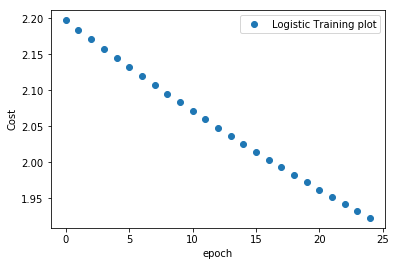

[1 5 5 ... 2 1 1]


In [13]:
with tf.Session() as session:
    #init variables
    session.run(tf.global_variables_initializer())
    
    cost_epochs=[]
    #training cycle
    
    for epoch in range(training_epochs):
        _, summary, c=session.run(fetches=[optimiser, summary_op, cost],
                                 feed_dict={x:X_train, y:Y_train})
        cost_epochs.append(c)
      #  writer.add_summary(summary=symmary, global_step=epoch)
        print("accuracy epoch {}:{}".format(epoch, accuracy.eval({x:X_train, y:Y_train})))
    
    print("Training phase finished")
    
    plt.plot(range(len(cost_epochs)), cost_epochs, "o", label="Logistic Training plot")
    plt.ylabel("Cost")
    plt.xlabel("epoch")
    plt.legend()
    plt.show()
    
    prediction=tf.argmax(activation, 1)
    print(prediction.eval({x: X_test}))

## Using Keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [15]:
dims=X_train.shape[1]
print(dims, 'dims')
print("building the model....")

nb_classes=Y_train.shape[1]
print(nb_classes,"classes")

#dense =fully connected
model=Sequential()
model.add(Dense(nb_classes, input_shape=(dims,), activation='sigmoid'))
# 1st param: no.of units
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train, epochs=10)

93 dims
building the model....
9 classes
Epoch 1/10
61878/61878 [==============================] - 4s 63us/step - loss: 1.9906
Epoch 2/10
61878/61878 [==============================] - 3s 45us/step - loss: 1.8360
Epoch 3/10
61878/61878 [==============================] - 3s 45us/step - loss: 1.7808
Epoch 4/10
61878/61878 [==============================] - 3s 47us/step - loss: 1.7459
Epoch 5/10
61878/61878 [==============================] - 3s 48us/step - loss: 1.7208
Epoch 6/10
61878/61878 [==============================] - 3s 45us/step - loss: 1.7018
Epoch 7/10
61878/61878 [==============================] - 4s 66us/step - loss: 1.6869
Epoch 8/10
61878/61878 [==============================] - 3s 44us/step - loss: 1.6749
Epoch 9/10
61878/61878 [==============================] - 3s 47us/step - loss: 1.6650
Epoch 10/10
61878/61878 [==============================] - 4s 60us/step - loss: 1.6568


In [19]:
y_pred1=model.predict(X_test)
y_pred1.argmax(axis=-1)

array([1, 5, 5, ..., 2, 1, 1], dtype=int64)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 846       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


In [44]:
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.15, random_state=0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(44706, 93) (44706, 9) (7890, 93) (7890, 9)


In [45]:
model=Sequential()
model.add(Dense(100, input_shape=(dims, )))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20,
         batch_size=120, verbose=True)

Train on 44706 samples, validate on 7890 samples
Epoch 1/20
44706/44706 [==============================] - 1s 29us/step - loss: 1.2206 - val_loss: 0.8956
Epoch 2/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.8372 - val_loss: 0.7941
Epoch 3/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.7728 - val_loss: 0.7522
Epoch 4/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.7406 - val_loss: 0.7276
Epoch 5/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.7203 - val_loss: 0.7113
Epoch 6/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.7062 - val_loss: 0.6998
Epoch 7/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.6955 - val_loss: 0.6906
Epoch 8/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.6878 - val_loss: 0.6842
Epoch 9/20
44706/44706 [==============================] - 1s 21us/step - loss: 0.6812 - val_loss: 0.6782
Epoch 

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 909       
_________________________________________________________________
activation_3 (Activation)    (None, 9)                 0         
Total params: 10,309
Trainable params: 10,309
Non-trainable params: 0
_________________________________________________________________


In [127]:
model?

In [47]:
y_pred=model.predict(X_test, verbose=True)

144368/144368 [==============================] - 3s 19us/step


In [48]:
y_pred.argmax(axis=-1)

array([3, 7, 5, ..., 2, 1, 1], dtype=int64)

In [49]:
y_pred2=model.predict(X_val)
val_Y=y_pred2.argmax(axis=-1)

In [51]:
val_Y.shape
Y_val.shape

(7890, 9)

In [72]:
def decode(datum):
    return np.argmax(datum)
Y_va=[]
for i in range(Y_val.shape[0]):
    datum = Y_val[i]
    decoded_datum = decode(Y_val[i])
    Y_va.append(decoded_datum)

In [75]:
Yva=np.array(Y_va)

In [76]:
Yva.shape

(7890,)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(Yva, val_Y)

0.7591888466413181